In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import tensorflow as tf
from tensorflow import keras

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, SGDRegressor

from useful_functions import load_transform_split, scatter_resid, scatter_predvreal, plot_performance

from RandomSeedSearchCV import RandomSeedSearchCV

#### Load data, clean, split into training/testing, etc.

In [10]:
X_train,X_test,y_train,y_test,pipeline = load_transform_split(target='DROPOUT_N',
                                                              expand=False,
                                                              clean=True,
                                                              split=0.1,
                                                              return_pipeline=True,
                                                              fmt='numpy',
                                                              random_state=24)
print(X_train.shape,X_test.shape)
#Get cohort count for weights
dftra,dftes = load_transform_split(target=None,
                                      expand=False,
                                      clean=False,
                                      split=0.1,
                                      return_pipeline=False,
                                      fmt='pandas',
                                      random_state=24)
w_train = dftra['COHORT_CNT']+100
w_test  = dftes['COHORT_CNT']+100

(64863, 19) (7207, 19)


#### Try a test neural net.

In [23]:
model = keras.models.Sequential([
    keras.layers.Dense(20,activation='tanh',input_shape=[X_train.shape[1]],kernel_initializer='he_normal'),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(5,activation='relu'),
    keras.layers.Dense(1,activation='relu'),
])
optimizer = keras.optimizers.Adam()
model.compile(loss='mean_squared_error', optimizer=optimizer)

In [24]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 20)                400       
_________________________________________________________________
dense_26 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_27 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_28 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 6         
Total params: 781
Trainable params: 781
Non-trainable params: 0
_________________________________________________________________


In [25]:
w_train /= np.max(w_train)
history = model.fit(X_train,y_train,epochs=25,validation_split=0.1,sample_weight=w_train)
print("Training MSE: %.2f, Testing MSE: %.2f"%(
      mean_squared_error(model.predict(X_train),y_train),
      mean_squared_error(model.predict(X_test),y_test)))

Train on 58376 samples, validate on 6487 samples
Epoch 1/25
58376/58376 [==============================] - 15s 259us/sample - loss: 1.3618 - val_loss: 1.1762
Epoch 2/25
58376/58376 [==============================] - 10s 165us/sample - loss: 1.0232 - val_loss: 1.0591
Epoch 3/25
58376/58376 [==============================] - 11s 180us/sample - loss: 0.8950 - val_loss: 1.0013
Epoch 4/25
58376/58376 [==============================] - 11s 184us/sample - loss: 0.8381 - val_loss: 0.9571
Epoch 5/25
58376/58376 [==============================] - 10s 178us/sample - loss: 0.7986 - val_loss: 0.9714
Epoch 6/25
58376/58376 [==============================] - 11s 188us/sample - loss: 0.7823 - val_loss: 0.9378
Epoch 7/25
58376/58376 [==============================] - 11s 183us/sample - loss: 0.7643 - val_loss: 0.8879
Epoch 8/25
58376/58376 [==============================] - 10s 172us/sample - loss: 0.7463 - val_loss: 0.9094
Epoch 9/25
58376/58376 [==============================] - 10s 172us/sample - lo

<IPython.core.display.Javascript object>


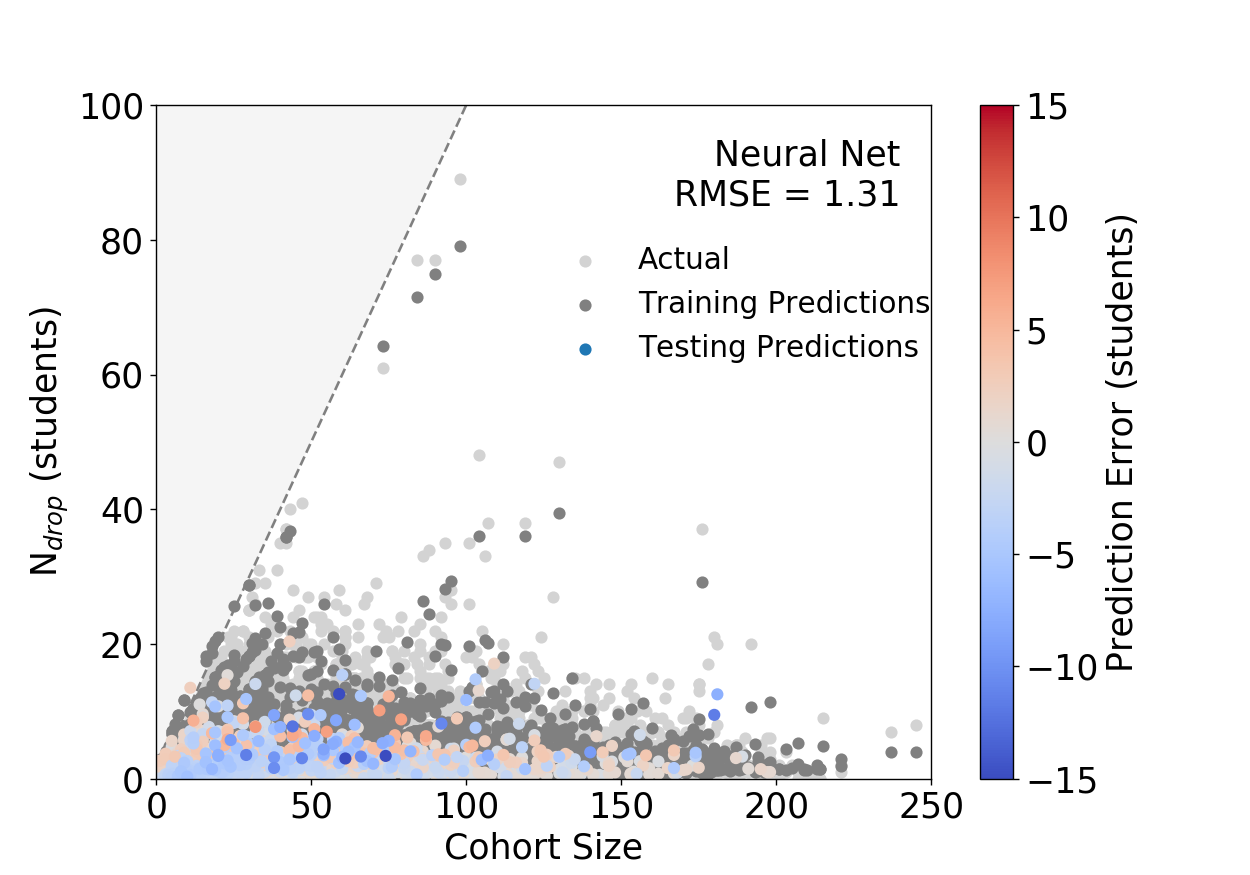

In [29]:
ax = plot_performance(model,'Neural Net',X_train,X_test,y_train,y_test,random_state=24)
ax.figure.savefig('figures/weighted_neuralnet_attempt1_summary.png',dpi=450)

In [33]:
print(X_test.shape,y_test.shape,model.predict(X_test).shape)
ax.set_xlim(0,250)
ax.set_ylim(0,100)

(7207, 19) (7207, 1) (7207, 1)


(0, 100)

In [ ]:
def randomseed_neuralnet_maker(seed,**kwargs):
    # Default Parameters!
    params = {
              'nhidden_lo':2,
              'nhidden_hi':5,
              'nhidden':   None,
        
              'activation_opts':['tanh',]
    }

In [46]:
N = X_train[:,0]
N = (N-np.min(N))*244+1
print(N)

[  1.          20.41869709  68.96543981 ... 214.60566797  10.70934854
 224.31501652]


In [38]:
X_train,X_test,y_train,y_test,pipeline = load_transform_split(target='DROPOUT_N',
                                                              expand=False,
                                                              clean=True,
                                                              split=0.2,
                                                              return_pipeline=True,
                                                              fmt='pandas',
                                                              random_state=24)

In [41]:
X_train

,COHORT_CNT,per_capita_income,median_household_income,median_family_income,StudentNumber,STRatio,MathProficiency,ReadingProficiency,GENDER,DISABILITY_FLAG,DISADVANTAGED_FLAG,LEP_FLAG,FEDERAL_RACE_CODE_0,FEDERAL_RACE_CODE_1,FEDERAL_RACE_CODE_2,FEDERAL_RACE_CODE_3,FEDERAL_RACE_CODE_4,FEDERAL_RACE_CODE_5,FEDERAL_RACE_CODE_6
0,-0.554836,0.118868,0.812853,0.607501,0.764304,0.999323,0.995822,0.625152,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.475251,1.153725,1.691007,1.651256,0.126430,-1.315932,-0.395480,0.334535,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.276289,-0.927052,-1.133099,-1.115444,-0.971833,-0.389830,-0.830262,-0.537316,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.554836,1.265168,1.148096,1.179628,1.283410,0.536272,0.647997,0.915769,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.515044,0.220364,0.736114,0.541995,1.621029,0.999323,0.908866,1.061078,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57651,-0.554836,1.265168,1.148096,1.179628,0.800334,0.536272,1.343648,1.206386,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
57652,-0.515044,1.265168,1.148096,1.179628,1.597009,0.536272,0.995822,1.206386,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
57653,0.320597,-0.251605,-0.296963,-0.379426,0.903088,1.925426,0.734953,0.189227,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
57654,-0.515044,-0.170291,-0.035455,-0.077138,0.457377,0.999323,0.387128,0.479844,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [48]:
X_train,X_test,y_train,y_test,pipeline = load_transform_split(target='DROPOUT_N',
                                                              expand=False,
                                                              clean=False,
                                                              split=0.2,
                                                              return_pipeline=True,
                                                              fmt='pandas',
                                                              random_state=24)

In [49]:
min(X_train['COHORT_CNT'])

1